In [1]:
import numpy as np
import pandas as pd

# Allow pretty printing of pandas dataframes etc
from IPython.display import display

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report,\
precision_score, recall_score, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Show more rows and columns by default
pd.options.display.max_seq_items = 500
pd.set_option('max_rows', 500)
pd.set_option('max_columns', 500)

In [2]:
news_df = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')

In [3]:
news_df.head(2)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.35000,-0.600,-0.2,0.5,-0.1875,0.0,0.1875,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.11875,-0.125,-0.1,0.0,0.0000,0.5,0.0000,711


In [5]:
news_df['share_bins'] = pd.qcut(news_df[' shares'],
                              q=2, labels=[0,1])
news_df.head(2)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,share_bins
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.35000,-0.600,-0.2,0.5,-0.1875,0.0,0.1875,593,0
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.11875,-0.125,-0.1,0.0,0.0000,0.5,0.0000,711,0


In [10]:
X_df = news_df.drop(['url',' shares','share_bins'], axis=1)
display(X_df.head(2))

X = np.array(X_df)
display(X)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.35000,-0.600,-0.2,0.5,-0.1875,0.0,0.1875
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.11875,-0.125,-0.1,0.0,0.0000,0.5,0.0000


array([[  7.31000000e+02,   1.20000000e+01,   2.19000000e+02, ...,
         -1.87500000e-01,   0.00000000e+00,   1.87500000e-01],
       [  7.31000000e+02,   9.00000000e+00,   2.55000000e+02, ...,
          0.00000000e+00,   5.00000000e-01,   0.00000000e+00],
       [  7.31000000e+02,   9.00000000e+00,   2.11000000e+02, ...,
          0.00000000e+00,   5.00000000e-01,   0.00000000e+00],
       ..., 
       [  8.00000000e+00,   1.00000000e+01,   4.42000000e+02, ...,
          1.36363636e-01,   4.54545455e-02,   1.36363636e-01],
       [  8.00000000e+00,   6.00000000e+00,   6.82000000e+02, ...,
          0.00000000e+00,   5.00000000e-01,   0.00000000e+00],
       [  8.00000000e+00,   1.00000000e+01,   1.57000000e+02, ...,
          2.50000000e-01,   1.66666667e-01,   2.50000000e-01]])

In [11]:
y = news_df['share_bins']
y = np.array(y)
print(y)

[0 0 1 ..., 1 0 0]


In [12]:
for a,b in zip(X[:10], y[:10]):
    print(a,b)

[  7.31000000e+02   1.20000000e+01   2.19000000e+02   6.63594467e-01
   9.99999992e-01   8.15384609e-01   4.00000000e+00   2.00000000e+00
   1.00000000e+00   0.00000000e+00   4.68036530e+00   5.00000000e+00
   0.00000000e+00   1.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   4.96000000e+02
   4.96000000e+02   4.96000000e+02   1.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.00331204e-01   3.78278930e-01
   4.00046751e-02   4.12626477e-02   4.01225435e-02   5.21617145e-01
   9.25619835e-02   4.56621005e-02   1.36986301e-02   7.69230769e-01
   2.30769231e-01   3.78636364e-01   1.00000000e-01   7.00000000e-01
  -3.50000000e-01  -6.00000000e-01  -2.00000000e-01   5.00000000e-01
  -1.87500000e-01   0.00000000e+00

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
y_actual = y_test

In [16]:
# Train a DT model on the training set
dt_model = DecisionTreeClassifier(min_samples_leaf=20)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=20,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [17]:
# The default model score for a decision tree is the accuracy
print(dt_model.score(X_train, y_train))
print(dt_model.score(X_test, y_actual))

0.761117117117
0.604590549857


In [18]:
# Train a RF model on the training set
rf_model = RandomForestClassifier(max_features='auto', min_samples_leaf=20, n_estimators=10)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=20,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [19]:
print(rf_model.score(X_train, y_train))
print(rf_model.score(X_test, y_actual))

0.766306306306
0.649403060367


In [20]:
y_pred = rf_model.predict(X_test)
print(classification_report(y_actual,
                            y_pred))

             precision    recall  f1-score   support

          0       0.66      0.65      0.66      6072
          1       0.64      0.65      0.64      5822

avg / total       0.65      0.65      0.65     11894



In [25]:
param_grid = {
    'max_features': ['sqrt', 'log2'],
    'n_estimators': [500],
    'min_samples_leaf': [20]
}

rf_model = RandomForestClassifier()

grid_search_model = GridSearchCV(estimator=rf_model,
                                 param_grid=param_grid,
                                 refit=True, n_jobs=4)
grid_search_model.fit(X_train, y_train)
grid_search_model.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=20,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [23]:
print(grid_search_model.score(X_train, y_train))
print(grid_search_model.score(X_test, y_actual))

y_pred = grid_search_model.predict(X_test)
print(classification_report(y_actual,
                            y_pred))

0.785477477477
0.6642845132
             precision    recall  f1-score   support

          0       0.67      0.67      0.67      6072
          1       0.66      0.66      0.66      5822

avg / total       0.66      0.66      0.66     11894



Some example probabilities: [[ 0.75475881  0.24524119]
 [ 0.50562866  0.49437134]
 [ 0.40143811  0.59856189]
 [ 0.267145    0.732855  ]
 [ 0.46179546  0.53820454]
 [ 0.42881166  0.57118834]
 [ 0.40074619  0.59925381]
 [ 0.48643632  0.51356368]
 [ 0.47921458  0.52078542]
 [ 0.34234915  0.65765085]]
Just the '1' probabilities: [0.24524118849930668, 0.49437134031640029, 0.59856188969730384, 0.73285499897730044, 0.5382045402170208, 0.57118833708243422, 0.59925380703537023, 0.51356367616042975, 0.5207854222198014, 0.65765085346962471]
Average precision is 0.707852322784


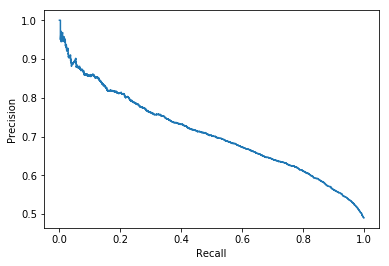

In [26]:
# RF gives us pretty good probability estimates, so let's look at precision vs recall
# as we vary the probability threshold
y_pred_probs = grid_search_model.predict_proba(X_test)
print("Some example probabilities:", y_pred_probs[:10])

# y_pred_probs contains probabilities for both '1' and '0'. We only
# care about the probabilities of '1', so we extract it below.
high_index = grid_search_model.best_estimator_.classes_.tolist().index(1)
y_high_probs = [y_pred_probs[i, high_index] for i in range(y_pred_probs.shape[0])]

print("Just the '1' probabilities:", y_high_probs[:10])

average_precision = average_precision_score(y_actual, y_high_probs)
precisions, recalls, _ = precision_recall_curve(y_actual,
                                                y_high_probs)

print("Average precision is", average_precision)
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [27]:
# Get the top 10 feature importances
# zip returns an iterator in Python 3 (so as not to waste memory by creating all elements
# unnecessarily), hence the conversion into a list
features_importances = list(zip(X_df.columns, grid_search_model.best_estimator_.feature_importances_))
features_importances.sort(key=lambda x:x[1], reverse=True)
features_importances[:10]

[(' kw_avg_avg', 0.066484083214899986),
 (' kw_max_avg', 0.05721354840152422),
 (' self_reference_min_shares', 0.049363367222456676),
 (' self_reference_avg_sharess', 0.043228907849019164),
 (' LDA_02', 0.036363548077108197),
 (' kw_min_avg', 0.03282641304881561),
 (' self_reference_max_shares', 0.029428153112724814),
 (' timedelta', 0.027704298200119534),
 (' LDA_01', 0.027093370657497218),
 (' LDA_04', 0.026731695124971894)]